In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [4]:
bike_racks = pd.read_csv('../data/BikeRacks.csv')
print(bike_racks.shape)
bike_racks.head(3)

(430, 13)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [5]:
bike_racks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    430 non-null    object 
 1   Type        430 non-null    object 
 2   OBJECTID    430 non-null    int64  
 3   Domain      430 non-null    object 
 4   Status      430 non-null    object 
 5   IDNumber    430 non-null    int64  
 6   Quantity    430 non-null    int64  
 7   Location    430 non-null    object 
 8   Capacity    430 non-null    int64  
 9   LON         426 non-null    float64
 10  LAT         426 non-null    float64
 11  Detail_Loc  430 non-null    object 
 12  Data_Colle  430 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 43.8+ KB


In [13]:
bike_racks['geometry'] = bike_racks.apply(lambda x: Point((x.LON, 
                                                         x.LAT)), 
                                        axis=1)
bike_racks.head(3)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.6554527779 36.0499277778)
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.6340625226 36.1852800378)
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.6206705697 36.1584215986)


In [7]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
bike_geo = gpd.GeoDataFrame(bike_racks, 
                           crs = zipcodes.crs, 
                           geometry = bike_racks['geometry'])

In [15]:
type(bike_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [17]:
bike_racks_by_zip = gpd.sjoin(bike_geo, zipcodes, op = 'within')

In [18]:
bike_racks_by_zip.head()

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,zip,po_name
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.65545 36.04993),51,37013,ANTIOCH
140,POINT (-86.69827499968898 36.059083333058666),Rack,141,Public,Existing,174,1,Elementary School,20,-86.698275,36.059083,Cole Elementary School,Health Dept,POINT (-86.69827 36.05908),51,37013,ANTIOCH
141,POINT (-86.6721262460898 36.05514111298902),Rack,142,Public,Proposed,331,0,Middle School,0,-86.672126,36.055141,Antioch Middle School,Health Dept,POINT (-86.67213 36.05514),51,37013,ANTIOCH
142,POINT (-86.66938333382244 36.06725000006927),Rack,143,Public,Existing,175,2,Elementary School,52,-86.669383,36.067250,J E Moss Elementary School,Health Dept,POINT (-86.66938 36.06725),51,37013,ANTIOCH
143,POINT (-86.6642388884029 36.06707777817396),Rack,144,Public,Existing,176,2,Middle School,56,-86.664239,36.067078,Apollo Middle School,Health Dept,POINT (-86.66424 36.06708),51,37013,ANTIOCH


In [19]:
bike_racks_by_zip['zip'].value_counts()

37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37218    10
37221    10
37228     8
37217     8
37212     7
37205     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: zip, dtype: int64

In [20]:
bike_racks_in_37207 = bike_racks_by_zip.loc[bike_racks_by_zip['zip'] == '37207']
bike_racks_in_37207.shape

(21, 17)

In [21]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

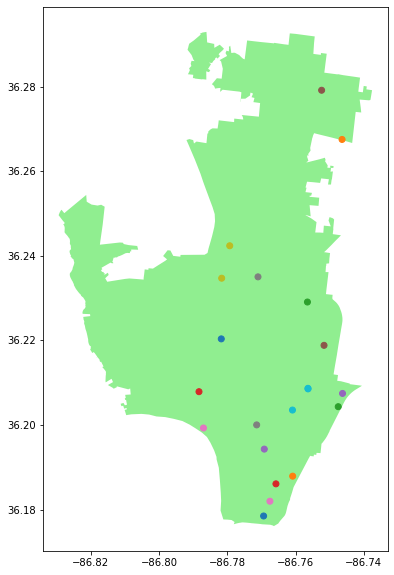

In [22]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
bike_racks_in_37207.plot( ax = ax, column = 'Detail_Loc');
plt.show();

In [23]:
polygon37207.geometry.centroid

/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_75177/3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

In [24]:
center = polygon37207.geometry.centroid[42] #point towards row 42, error says it wants latitude first in an array
print(center)

POINT (-86.77676762469858 36.23245257407244)


/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_75177/2732805924.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[42] #point towards row 42, error says it wants latitude first in an array


In [25]:
# reverse the order when constructing the array for folium location - this makes folium happy
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


In [26]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

In [27]:
i = 0
for row_index, row_values in bike_racks_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 36
values are:
 
the_geom       POINT (-86.74622777766213 36.207466666663926)
Type                                                    Rack
OBJECTID                                                  37
Domain                                                Public
Status                                              Proposed
IDNumber                                                 395
Quantity                                                   0
Location                                        Fire Station
Capacity                                                   0
LON                                               -86.746228
LAT                                                36.207467
Detail_Loc                                Heavy Vehicle Shop
Data_Colle                                       Health Dept
geometry                POINT (-86.7462277777 36.2074666667)
index_right                                               42
zip                                                    3720

In [28]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in bike_racks_in_37207.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Detail_Loc'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

In [29]:
folium.Map?

In [32]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in bike_racks_in_37207.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Detail_Loc'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207 

Trying again for 37206, where I will be moving soon!

In [33]:
bike_racks_in_37206 = bike_racks_by_zip.loc[bike_racks_by_zip['zip'] == '37206']
bike_racks_in_37206.shape

(36, 17)

In [34]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 3)

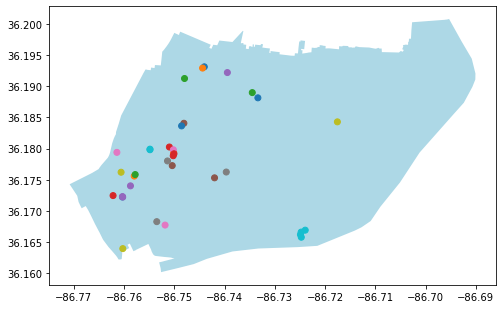

In [35]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightblue')
bike_racks_in_37206.plot( ax = ax, column = 'Detail_Loc');
plt.show();

In [37]:
polygon37206.geometry.centroid

/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_75177/4245166938.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37206.geometry.centroid


13    POINT (-86.73098 36.18090)
dtype: geometry

In [39]:
center = polygon37206.geometry.centroid[13] 
print(center)

POINT (-86.7309830626016 36.18089690922079)


/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_75177/2077615679.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37206.geometry.centroid[13] #point towards row 42, error says it wants latitude first in an array


In [40]:
area_center = [center.y, center.x]

print(area_center)

[36.18089690922079, -86.7309830626016]


In [41]:
map_37206 = folium.Map(location =  area_center, zoom_start = 12)
map_37206

In [42]:
i = 0
for row_index, row_values in bike_racks_in_37206.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 4
values are:
 
the_geom       POINT (-86.76218008308796 36.17245540617397)
Type                                                   Rack
OBJECTID                                                  5
Domain                                               Public
Status                                             Existing
IDNumber                                                103
Quantity                                                  3
Location                              Park/Community Center
Capacity                                                 15
LON                                               -86.76218
LAT                                               36.172455
Detail_Loc                     East Park & Community Center
Data_Colle                                      Health Dept
geometry           POINT (-86.76218008310001 36.1724554062)
index_right                                              13
zip                                                   37206
po_name        

In [43]:
#draw our zip code area: 37206
map_37206 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37206).add_to(map_37206)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in bike_racks_in_37206.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Detail_Loc'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37206)
map_37206.save('../maps/map37206.html')

#display our map
map_37206

In [44]:
cluster_map_37206 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37206)

folium.GeoJson(polygon37206).add_to(cluster_map_37206)

# inside the loop add each marker to the cluster
for row_index, row_values in bike_racks_in_37206.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Detail_Loc'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37206.save('../maps/cluster37206.html')

cluster_map_37206

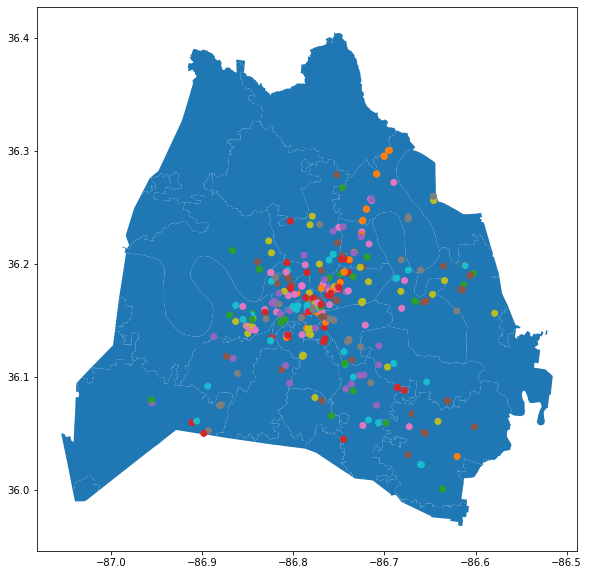

In [48]:
ax = zipcodes.plot(figsize=(10,10))
bike_racks_by_zip.plot(ax=ax, column= 'Detail_Loc')
plt.show()